In [1]:
# !pip install tensorflow==2.0.0
import tensorflow as tf

In [2]:
print(tf.__version__) # 2 underlines are required on each side for this to work

2.2.0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score
from sklearn.metrics import f1_score,precision_recall_curve,auc

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers



In [5]:
df=pd.read_csv('bank.csv')

# EDA

General look at head of data, type of content per column,  data type per column

1. Check for missing values
2. Remove columns that do not add value to prediction
3. Outlayer treatment 


In [6]:
display (df.head())
print ( 'The number of rows is', df.shape[0])
print ( 'The number of columns is', df.shape[1])
display(df.count())
print (' Are there missing values ?',df.isnull().values.any())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The number of rows is 10000
The number of columns is 14


RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

 Are there missing values ? False


In [7]:
# Another test showing there are no missing values - per column  or apply  df.isna().sum().sum()
df.count().isnull()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
# further exploratory data analysis by checking for unique values  in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
#  any duplicates to clean data set ? If so apply #df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [10]:
# check each column to understand its data type before we perform operations
# for example insuring that numbers are not stored as character strings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.head(0)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [12]:
# DROP COLUMNS WHICH ARE UNIQUE FOR ALL CUSTOMERS AND ADD NO PREDICTIVE VALUE 
df.drop('RowNumber', axis=1, inplace=True)
df.drop('CustomerId',axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)

In [13]:
# check if columns have been dropped as expeted
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# Examine the data for skewness, outlayers, etc
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [15]:
# data columns look well distributed.  Only EstimatedSalary has a minimum very  far from mean and 25% 1st Quartile- an outlayer,
# but we will  check for outlayers by visual inspection = boxplots

In [16]:
# IDENTIFY THE FEATURES AND TARGET VARIABLE
# THE TARGET VARIABLE IS THE ONE THAT IDENTIFIES IF THE CLIENT WILL BE LEAVING THE BANK IN THE NEXT 6 MONTHS !
# HENCE THE TARGET VARIABLE IS  THE  EXITED COLUMN
# THE REMAINING 8 COLUMNS ARE THE FEATURE COLUMNS

In [17]:
display(df.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Outlayer Treatment  Visualization Check

plt.figure(figsize=(15,10))
pos=1
for i in df.columns:
    plt.subplot(3,3,pos)
    sns.boxplot(df[i])
    pos+=1


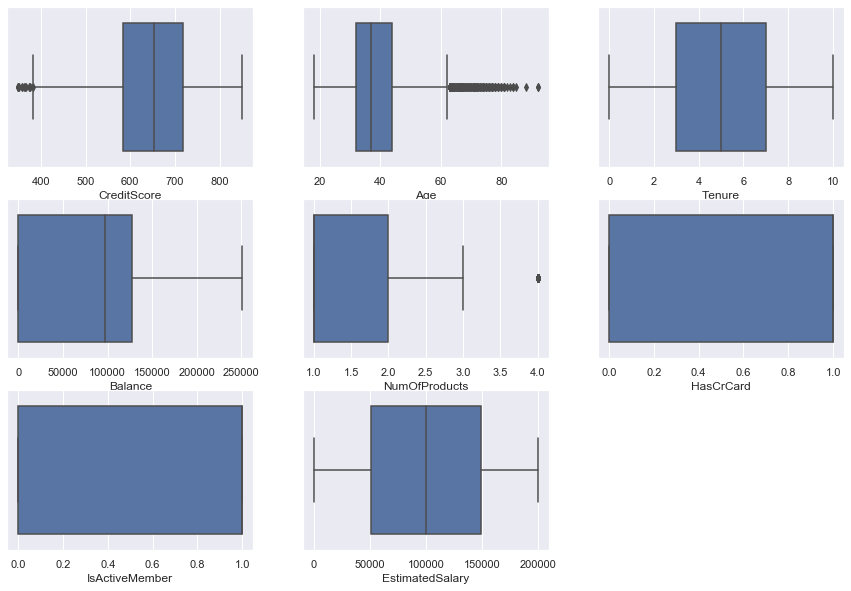

In [18]:
cols=['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
# list of independent variables to be checked for outlayers

plt.figure(figsize=(15,10))
pos=1
for i in cols:
    plt.subplot(3,3,pos) #---TN: Needs to be updated based on the number of columns. If we have more than 9 columns
    # we need to go to 4x3 grids in the plot aread. Can't have box plot for categorical data
    sns.boxplot(df[i])
    pos+=1

In [19]:
# treatment of outlayers- use the 1.5 IQR


In [20]:
cols1=['CreditScore','Age', 'Tenure', 'Balance', 'EstimatedSalary']


for i in cols:
    q1,q2,q3=df[i].quantile([0.25,0.5,0.75])
    IQR=q3-q1
    upper_cap=q3+1.5*IQR     
    lower_cap=q1-1.5*IQR
    df[i]=df[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

In [21]:
# now that data has been corrected for outlayers perform  Univariate Analysis to see if its still skewed

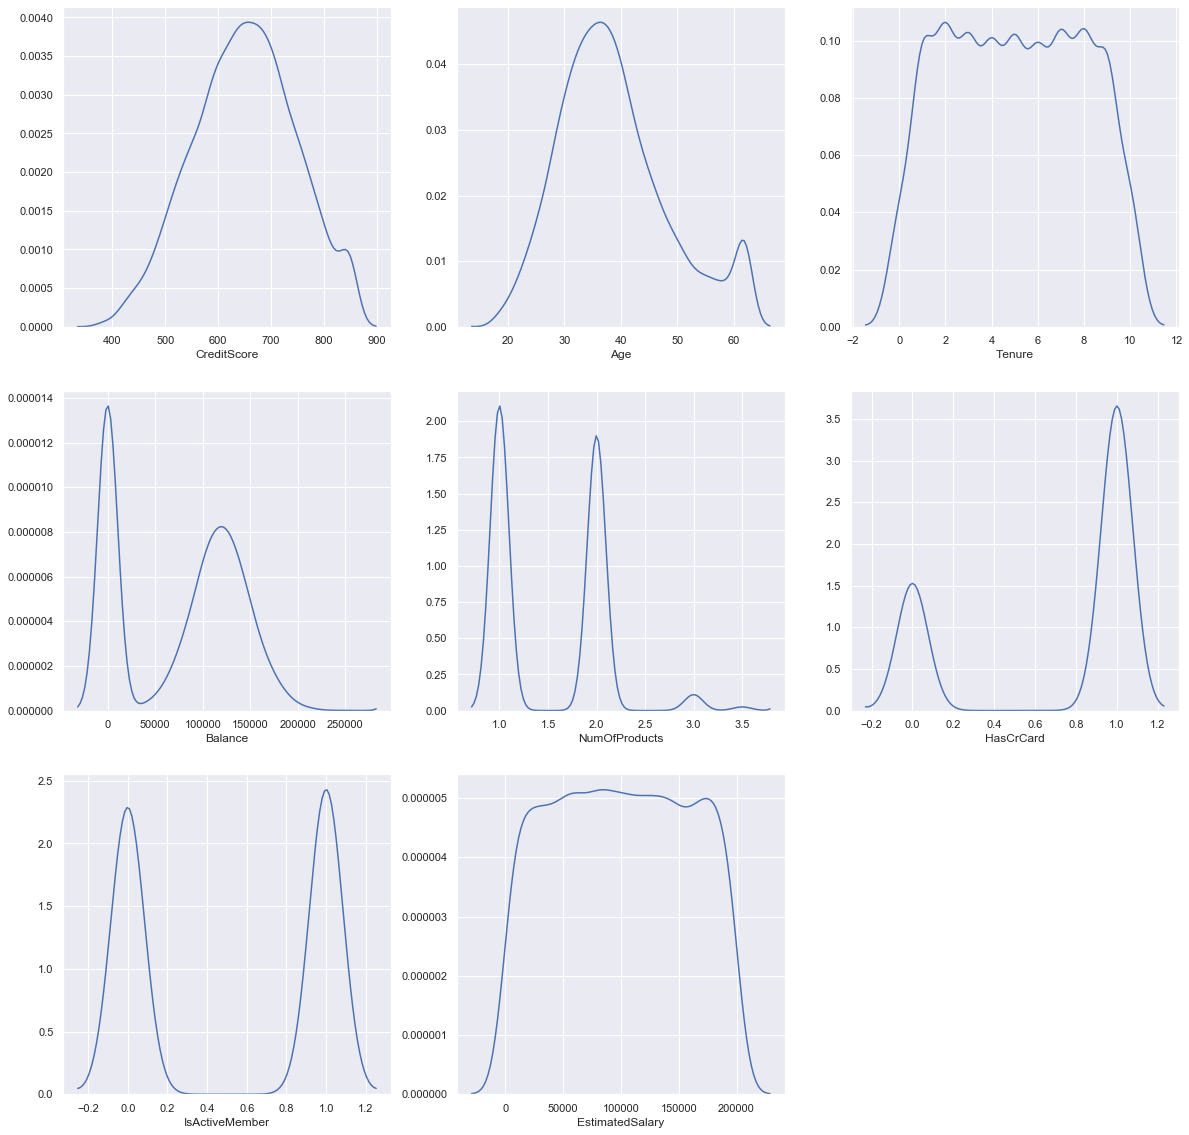

In [22]:

plt.figure(figsize=(20,20))
pos=1
for i in cols:
    plt.subplot(3,3,pos)
    sns.distplot(df[i], hist=False)
    pos+=1

In [23]:
# UNIVARIATE ANALYSIS 
# Credit score is a bit skewed, so is age- seems baby boomers,  probably due to demographis are over 60 and quite a few of them
#  Balances, NumOfProducts and HasCrCard are - ideal canidates  for clustering, :) but we are doing supervised learning here so
# Balances - shows 2 peaks with most people having around zero money (students, unemployed, retired) and quite a few have some
# money a second peak - the working class mid-aged people, which is refleted in Age and may be correlated with Balances

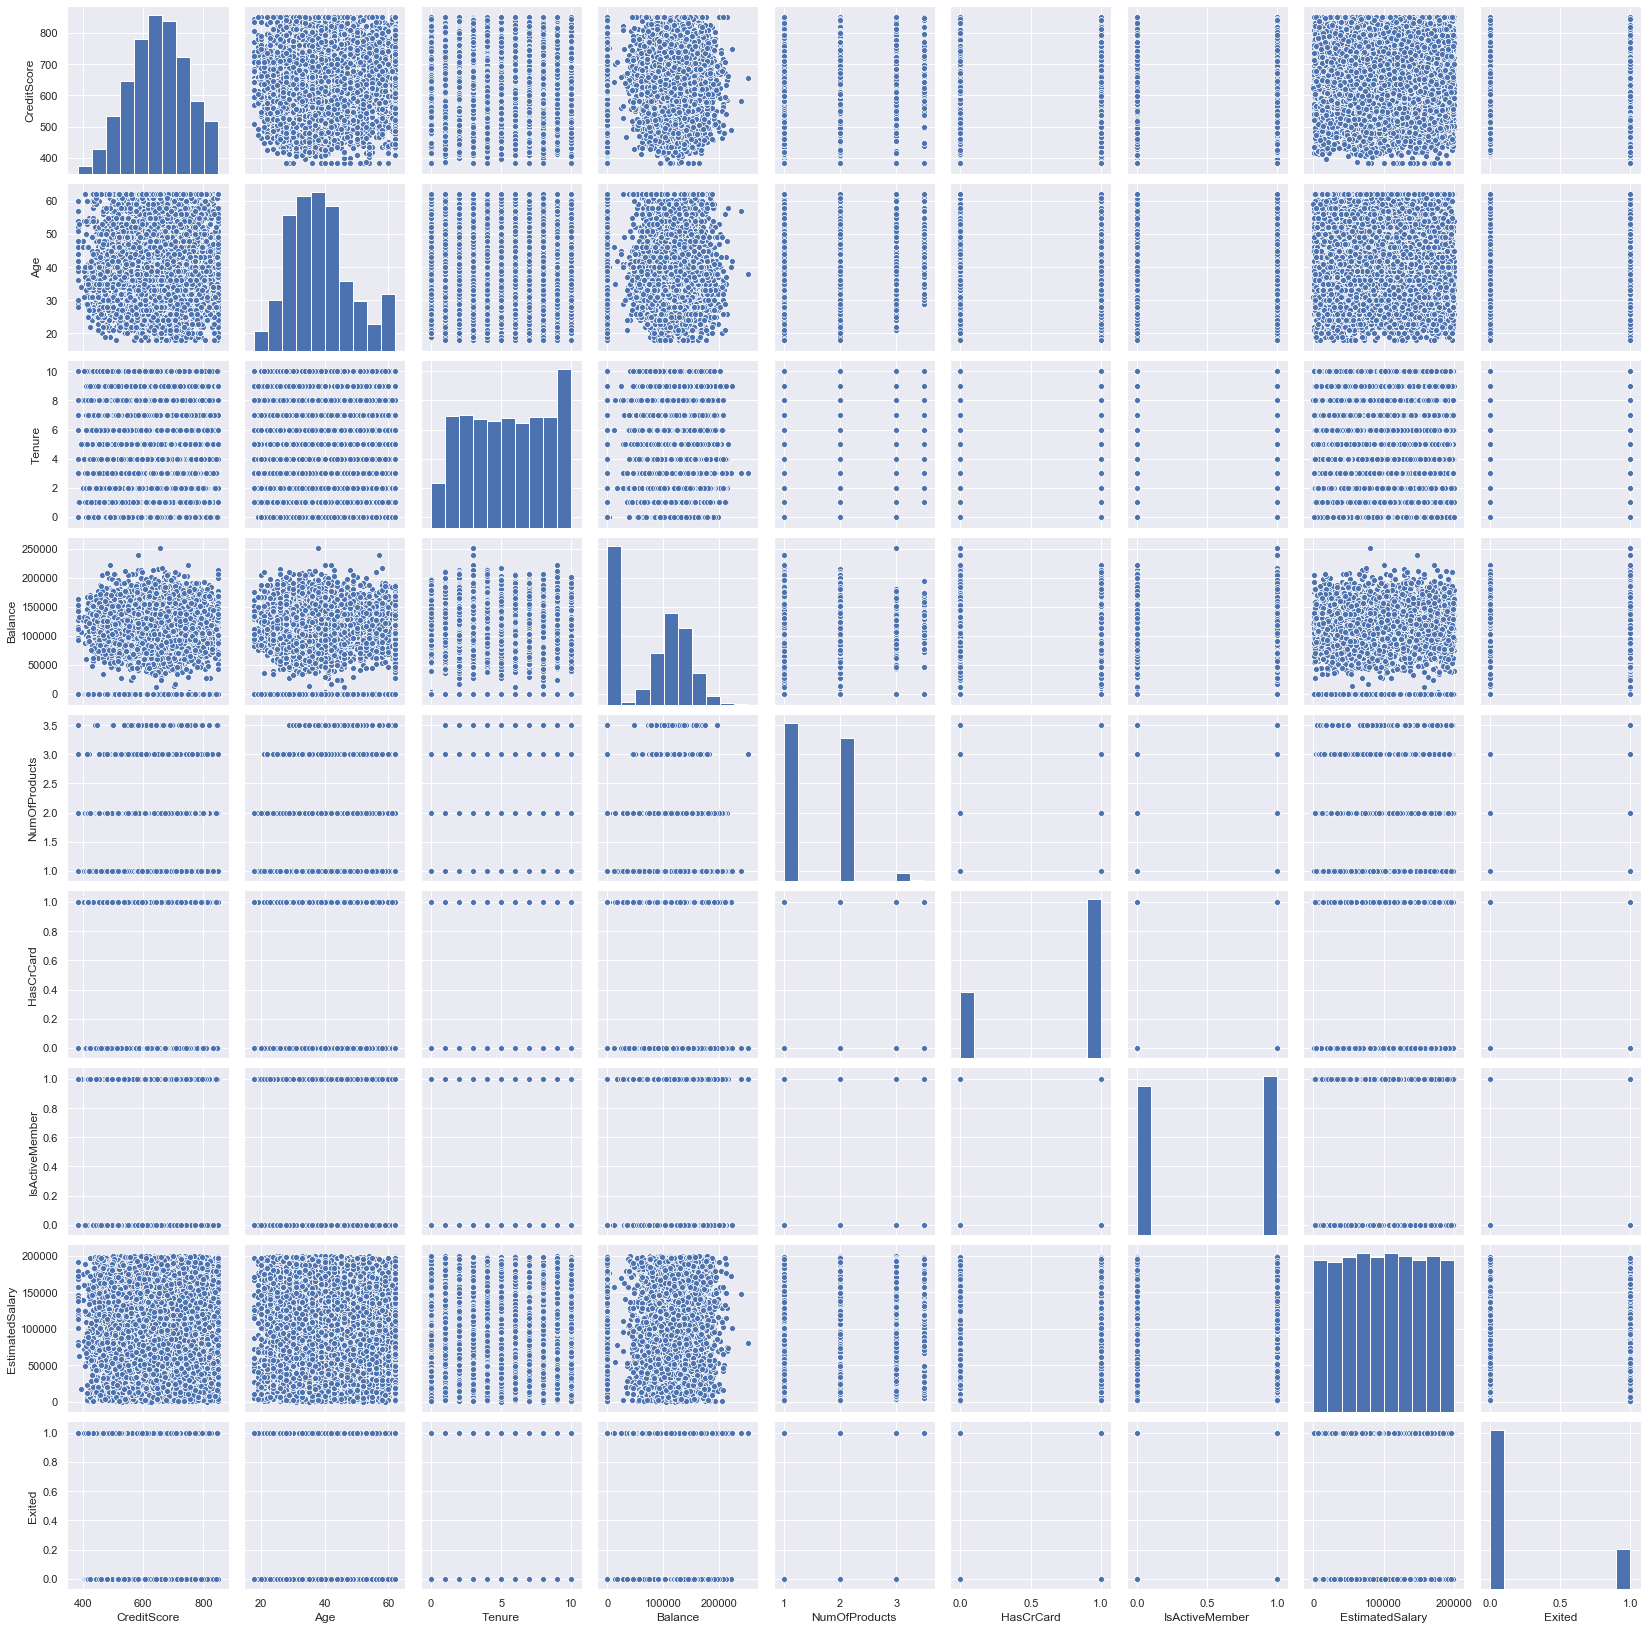

In [24]:
# Bivariate Analysis
sns.pairplot(df)

In [25]:
# Bivariate Analysis
# the plots do not show linear correlation, seems like data displayed is independent from one another 

In [26]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.0,1.0,1,1,101348.88,1


In [27]:
# drop the dependent variable, we are checking for correlation for independent vars
df_ind=df.iloc[:,0:10] 
df_ind.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,France,Female,42.0,2,0.0,1.0,1,1,101348.88


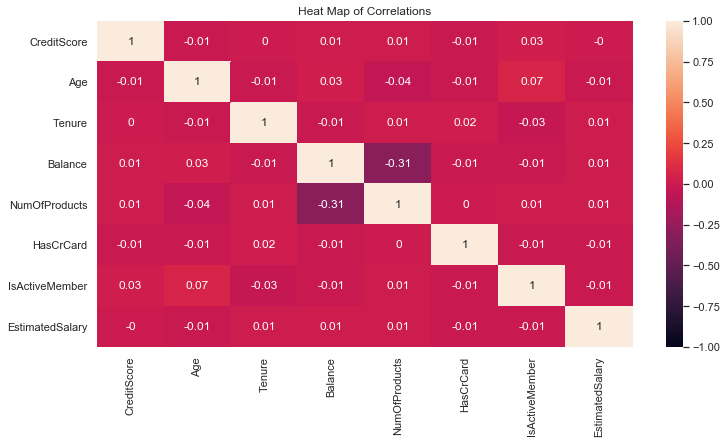

In [28]:
# Check for Correlation in Independent Variables,  drop higly correlatied ones

corr_data=df_ind.corr().round(2);
fig, ax=plt.subplots()
fig.set_size_inches(12,6)

plt.title ("Heat Map of Correlations")
sns.heatmap(corr_data,annot=True,vmin=-1,vmax=1) # SOMEWHOW cmap='Y1GnBu' is not working when  i add it here

In [29]:
# the varaiables are not correlated, values are far below the 0.5 general threshold - no need to drop any columns


In [30]:
df.nunique()

CreditScore         450
Geography             3
Gender                2
Age                  45
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

# Hot Encode  Categorical Features


In [31]:
#Hot Encode Categorical columns
df=pd.get_dummies(df, drop_first=True)

JUST NOTES FOR MYSELF - PLEASE IGNORE
df=pd.get_dummies(df['Geography'], columns=['Geography'])
df=pd.get_dummies(df, columns=['Gender'])

data_dummies=pd.get_dummies(df['Geography'],prefix=['Country'], columns=['Geography'])
data_dummies1=pd.get_dummies(df['Gender'],prefix=['Gender'], columns=['Gender'])
print(data_dummies.head(2))
data_dummies1.head(2)

df=pd.get_dummies(df) # why was the gender column also not hot encoded since it was an object column ?
does this not need to go back to main dataframe  with the original column being replaced (dropped) by dummies ?
do i need to specidically  hot encode for gender like so - df=pd.get_dummies(df, columns=['Gender']) (which is not working)

In [32]:
# visual view of the DF with dummies
df.tail() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9995,771.0,39.0,5,0.00,2.0,1,0,96270.64,0,0,0,1
9996,516.0,35.0,10,57369.61,1.0,1,1,101699.77,0,0,0,1
9997,709.0,36.0,7,0.00,1.0,0,1,42085.58,1,0,0,0
9998,772.0,42.0,3,75075.31,2.0,1,0,92888.52,1,1,0,1
9999,792.0,28.0,4,130142.79,1.0,1,0,38190.78,0,0,0,0


# Divide the Data Set into Training and Test Set

In [33]:
# dont we need to have a validation set of data ? should we not split data into 3 rather than 2. Why only 20% not 30% below ?
# do all input variables mustbe float32 or same data type ? How do we change all  numerical columns to one datatype ?
X=df.drop(['Exited'], axis=1) # set of independent variables
Y=df['Exited']

X_train,X_test, y_train,y_test=train_test_split(X,Y, test_size=0.20, random_state=1)


In [34]:
# I HAVE SET MY DEPENDENT VARIABLE AS EXITED. I SEE IN MENTOR SESSION FRAUD DETECTION Y HAS BEEN DEFINED AS 
# y_data = credit_data.iloc[:, -1]  - IS THIS JUST AN EMPTY SET WITH NO ROWS ? MUST I DO THAT ?

In [35]:
# we can see splitting of data has worked well- 8000 are in training set
X_train.shape

(8000, 11)

In [36]:
# Scale (Normalize) the data    # why dont we scale the y ? it is a supervised learning technique so we have to compare
# the results of actual y with predicted and must be on same scale ...
## WE DO NOT SCALE THE y_train or y_test since we are looking to compare predicted 0/1 with actual (unscaled) 0/1.
# Besides how woudld one scale 0 and 1-ones ?

scaler=preprocessing.MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [37]:
X_train.shape

(8000, 11)

In [38]:
# Initiate construction of ANN

In [39]:
#model= Sequential()


In [41]:
# add layers
model = Sequential(layers=None, name=None) #--TM: Step 1: Empty Model

model.add(Dense(8,input_shape = (11,), activation = 'relu')) #--TM: Step 2: Hidden layer 1; First input is number of neuron
#--TM: Step 2, Second input is number of input variables, i.e. 11; Refer to X_train.shape
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #  Output layer

sgd=optimizers.Adam(lr=0.001)

model.compile (loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# do we need this ?
# tf.keras.initializers.random_normal
# sgd=optimizers.Adam(lr=0.001)

In [ ]:
# Training the Model

In [42]:
model.fit(X_train,y_train.values, epochs=30, batch_size=2000, verbose=1) # verbose shows output, epochs is number of
                                                                  # runs to reduce error

Epoch 1/30
4/4 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.7794
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7864
Epoch 3/30
4/4 [==============================] - 0s 0s/step - loss: 0.5802 - accuracy: 0.7891
Epoch 4/30
4/4 [==============================] - 0s 1ms/step - loss: 0.5725 - accuracy: 0.7918
Epoch 5/30
4/4 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7945
Epoch 6/30
4/4 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7954
Epoch 7/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7956
Epoch 8/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.7961
Epoch 9/30
4/4 [==============================] - 0s 1ms/step - loss: 0.5392 - accuracy: 0.7966
Epoch 10/30
4/4 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7971
Epoch 11/30
4/4 [=======================

In [ ]:
# Evaluation of the model

In [45]:
results=model.evaluate(X_test,y_test.values)

63/63 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7925


In [49]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.4879456162452698, 0.7925000190734863]


In [51]:
#--Creating a data frame to store model results
resultsDf = pd.DataFrame({'Iteration': None, 'Method':['Adam - Check '], 'Log Loss': results[0], 'Accuracy': results[1]})
resultsDf = resultsDf[['Iteration', 'Method', 'Log Loss', 'Accuracy']]
resultsDf

,Iteration,Method,Log Loss,Accuracy
0,None,Adam - Check,0.487946,0.7925


In [52]:
Y_pred_cls = model.predict_classes(X_test, batch_size=2000, verbose=0)

print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))

print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))

print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))

print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
63/63 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7925
Accuracy Model1 (Dropout): 0.7925000190734863
Recall_score: 0.007228915662650603
Precision_score: 0.5
F-score: 0.014251781472684086


array([[1582,    3],
       [ 412,    3]], dtype=int64)

In [ ]:
# HYPERTUNING
# Experiment with number of neurons, & number of layers, optimizers and activation function to see if you can improve results


In [56]:
# sigmoid is placed here as the output node function.
def create_model(opt):
    
    # create model
    model = Sequential(layers=None, name=None)
    model.add(Dense(8, input_shape = (11,), activation = 'relu'))#we are using a different activation function here than above
    model.add(Dense(4, activation = 'relu')) # create second hidden layer
    model.add(Dense(1, activation = 'sigmoid')) # single binary output node
    
    # Compile model
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])
    
    return model

In [59]:
# try it with differenct optimizers to Hypertune completely
optimizer=['Adam','SGD','RMSProp','Adadelta','Adagrad','Adamax']

In [60]:
#  11 PICKED AS THE OPTIMAL NUMBER OF ITERATIONS IS THE INPUT VARIABLE
for j in range(1,11):
    
    print("Iteration:",j)
    
    for i in optimizer:
        
        mod=create_model(i)
        #print("Model:",i,end=' ')
        mod.fit(X_train, y_train.values, batch_size = 700, epochs = j, verbose = 0)
        results = mod.evaluate(X_test, y_test.values, verbose=0)
        #print(mod.metrics_names)
        #print(results)
        
        tempResultsDf = pd.DataFrame({'Iteration': j, 'Method':[i], 'Accuracy': results[1], 'Log Loss': results[0]})
        resultsDf = pd.concat([resultsDf, tempResultsDf])
        resultsDf = resultsDf[['Iteration', 'Method', 'Accuracy', 'Log Loss']]
        #resultsDf

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10


In [61]:
resultsDf=resultsDf[resultsDf['Iteration']>0]
resultsDf

,Iteration,Method,Accuracy,Log Loss
0,1,Adadelta,0.7925,0.625028
0,1,Adam,0.7715,0.592211
0,1,SGD,0.6260,0.695954
0,1,RMSProp,0.7910,0.654466
0,1,Adadelta,0.7360,0.656038
...,...,...,...,...
0,10,SGD,0.7880,0.616201
0,10,RMSProp,0.7925,0.481865
0,10,Adadelta,0.3900,0.762319
0,10,Adagrad,0.7925,0.627326


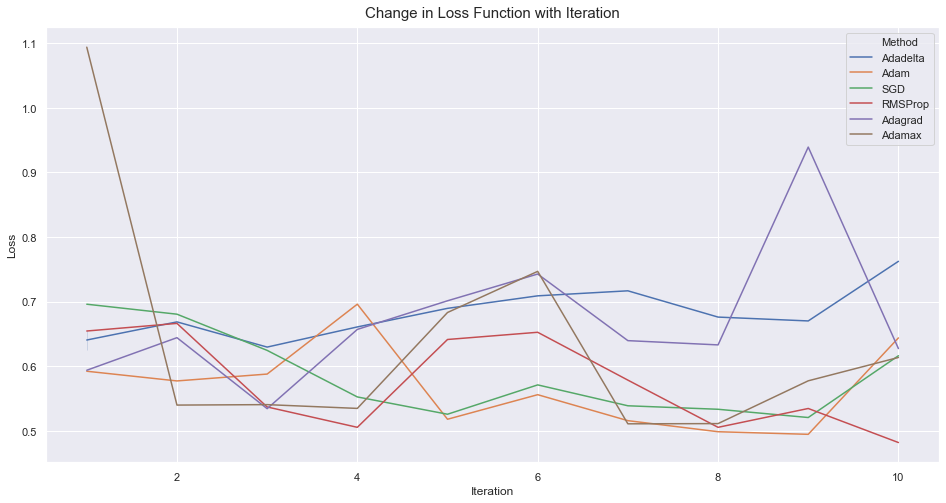

In [62]:
# A visual of the results of error reduction and approaching a minima

fig, ax = plt.subplots(figsize=(16,8)); #-----------------Setting size of the canvas

plt.title('Change in Loss Function with Iteration', fontsize=15, pad=10) 
#---------------------Title of the chart


sns.lineplot(x=resultsDf['Iteration'],y=resultsDf['Log Loss'],hue=resultsDf['Method']);


ax.set(xlabel='Iteration', ylabel='Loss');



In [64]:
resultsDf_temp=resultsDf[resultsDf['Method']!='Adadelta']
resultsDf_temp=resultsDf_temp[resultsDf_temp['Method']!='Adagrad']
resultsDf_temp

,Iteration,Method,Accuracy,Log Loss
0,1,Adam,0.7715,0.592211
0,1,SGD,0.6260,0.695954
0,1,RMSProp,0.7910,0.654466
0,1,Adamax,0.2075,1.093744
0,2,Adam,0.7925,0.577205
0,2,SGD,0.5935,0.680502
0,2,RMSProp,0.7625,0.666256
0,2,Adamax,0.7925,0.539828
0,3,Adam,0.7925,0.587831
0,3,SGD,0.7650,0.624506


In [65]:
resultsDf_temp[resultsDf_temp['Log Loss']==resultsDf_temp['Log Loss'].min()]

,Iteration,Method,Accuracy,Log Loss
0,10,RMSProp,0.7925,0.481865


In [ ]:
# Predict the Results  using 0.5 as a threshold 

In [ ]:
Y_pred = mod.predict_classes(X_test, batch_size=2000, verbose=0)

In [ ]:
# apply threshold of 0.5
Y_pred = (Y_pred > 0.5)
print(Y_pred)

In [ ]:
cm1 = confusion_matrix(y_test, Y_pred)
print(cm1)

In [ ]:
accuracy_model1 = ((cm1[0][0]+cm1[1][1])*100)/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0])
print (accuracy_model1, '% of testing data was classified correctly')